In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 

In [3]:
df = pd.read_csv("train_FD001.txt", sep = '\s+', header = None)
print(df.shape)

(20631, 26)


In [4]:
display(np.unique(df[0]))

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [5]:
cycles_to_failure = df.groupby(0)[1].count()
display(cycles_to_failure.values)

array([192, 287, 179, 189, 269, 188, 259, 150, 201, 222, 240, 170, 163,
       180, 207, 209, 276, 195, 158, 234, 195, 202, 168, 147, 230, 199,
       156, 165, 163, 194, 234, 191, 200, 195, 181, 158, 170, 194, 128,
       188, 216, 196, 207, 192, 158, 256, 214, 231, 215, 198, 213, 213,
       195, 257, 193, 275, 137, 147, 231, 172, 185, 180, 174, 283, 153,
       202, 313, 199, 362, 137, 208, 213, 213, 166, 229, 210, 154, 231,
       199, 185, 240, 214, 293, 267, 188, 278, 178, 213, 217, 154, 135,
       341, 155, 258, 283, 336, 202, 156, 185, 200], dtype=int64)

In [6]:
display(df.head())

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


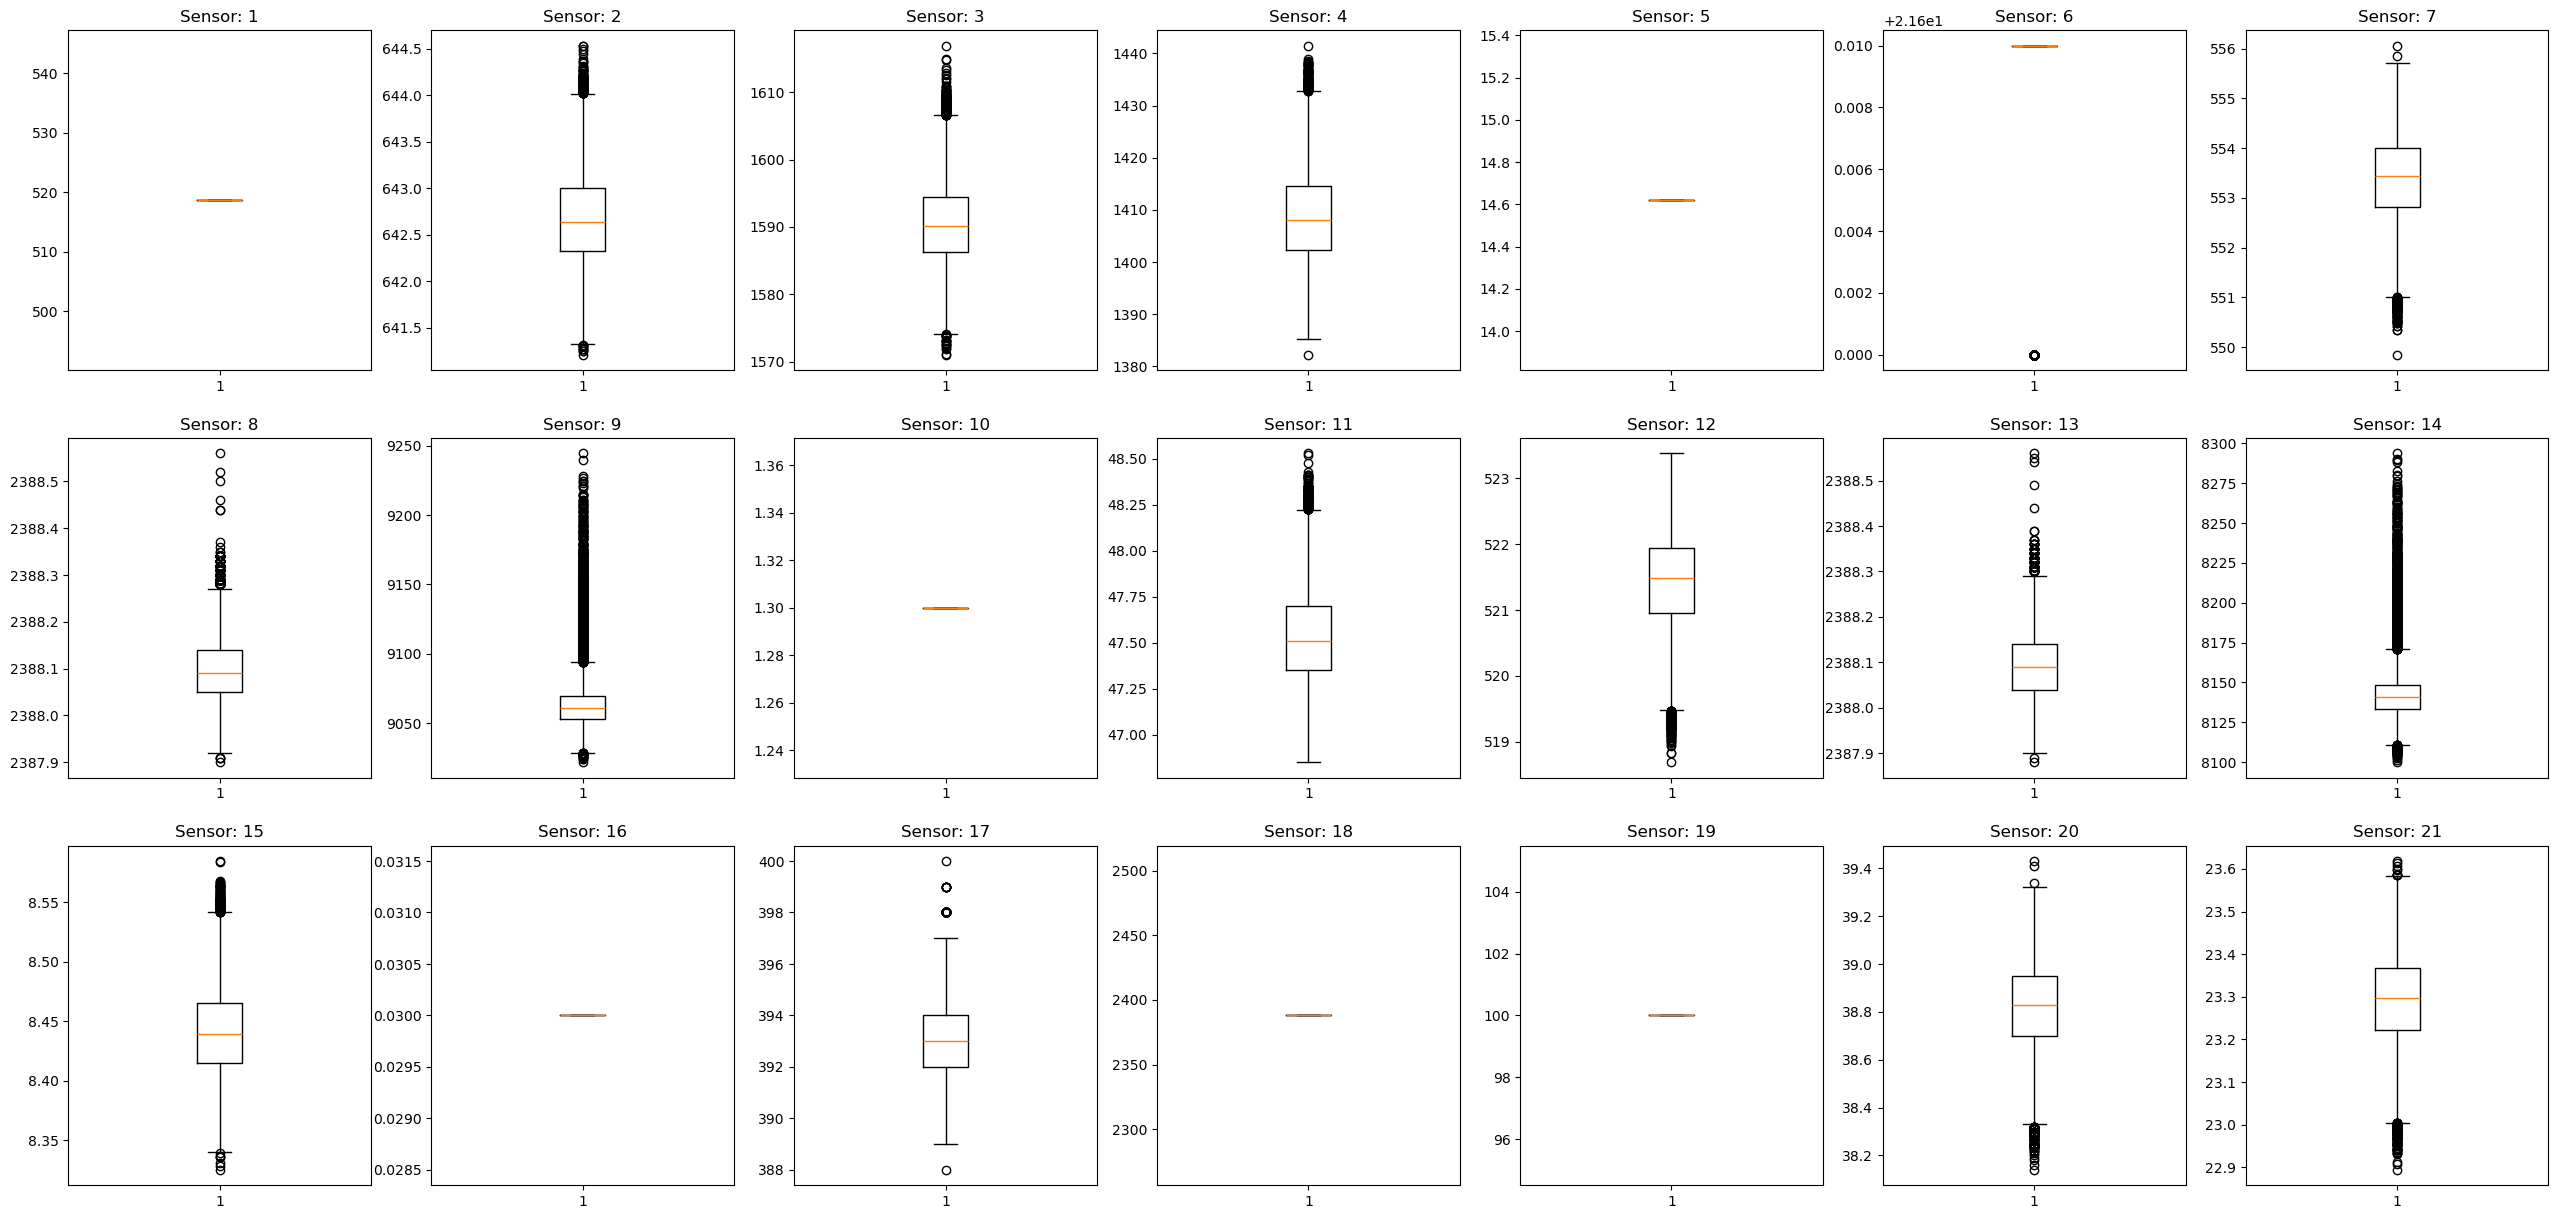

In [7]:
plt.figure(figsize = (32,15))
for i in np.arange(5, 26):        
    temp = df.iloc[:, i]
    plt.subplot(3,7,i-4)
    plt.boxplot(temp)
    plt.title("Sensor: "+ str(i-4))
plt.show()

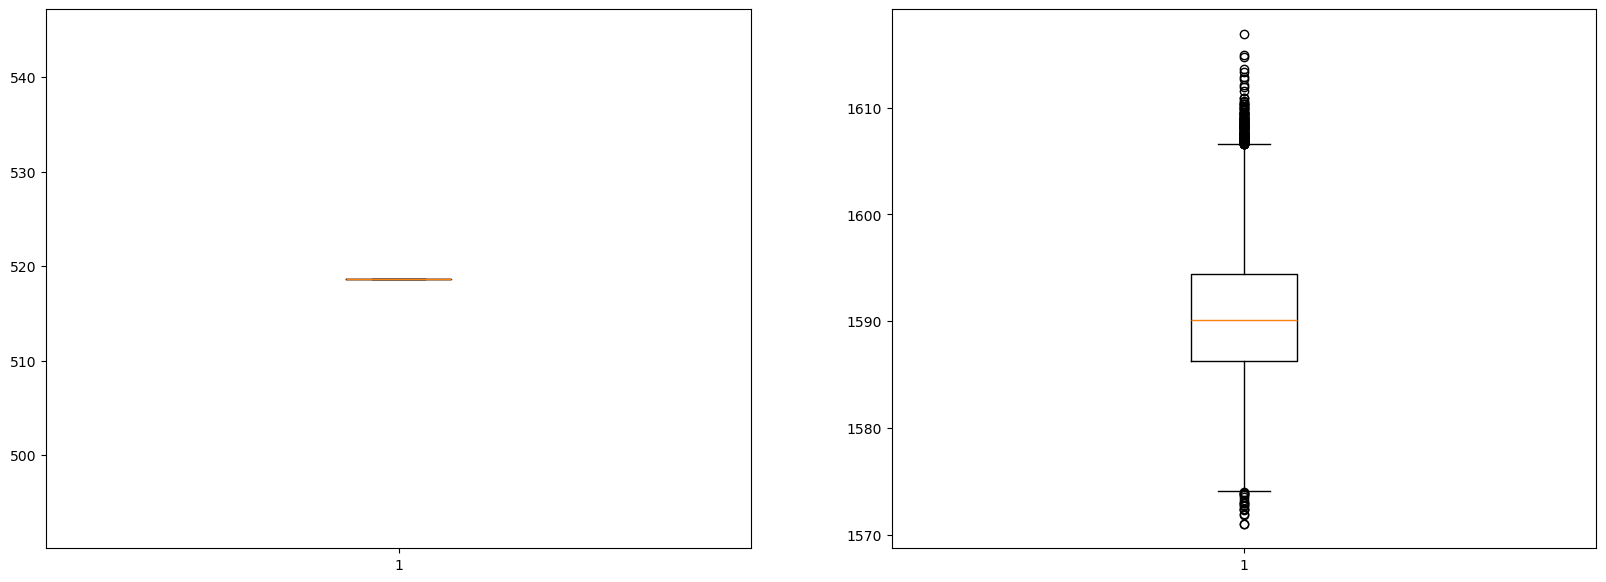

In [8]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.boxplot(df[5])
plt.subplot(1,2,2)
plt.boxplot(df[7])
plt.show()

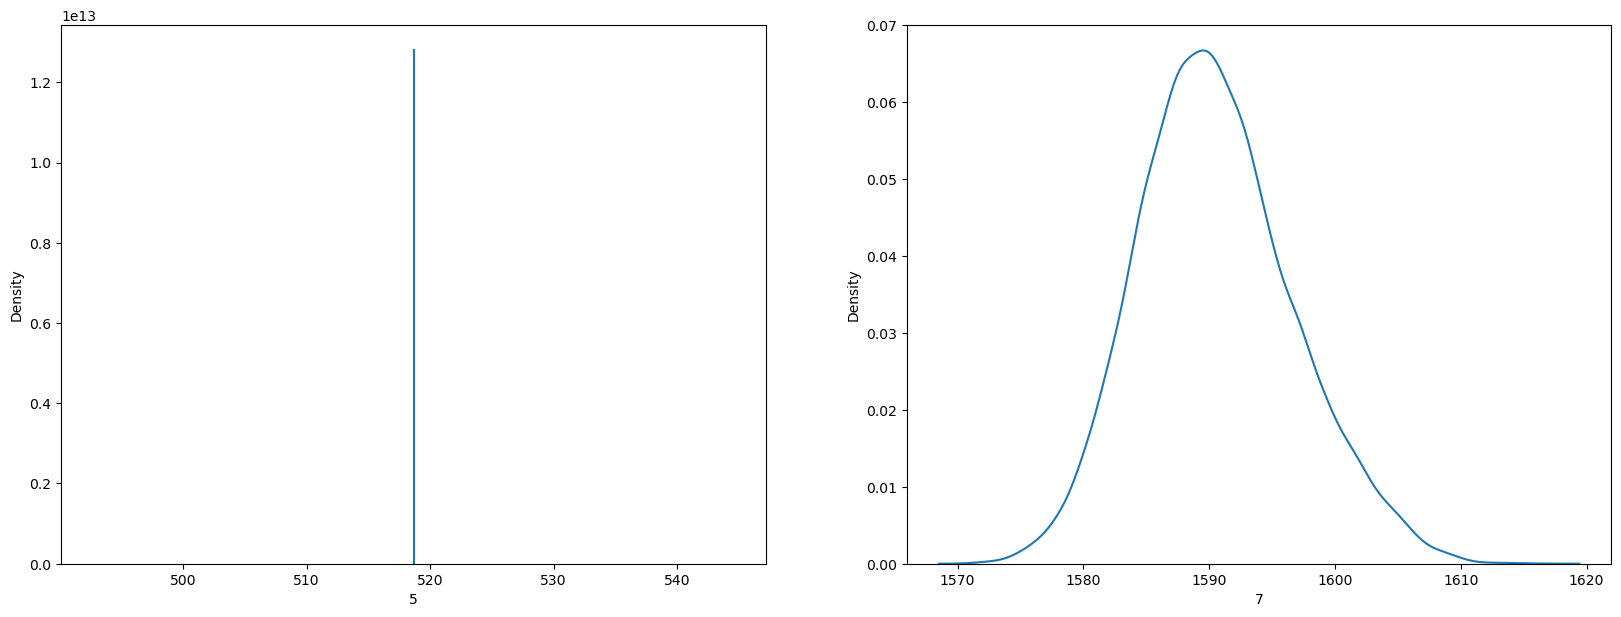

In [9]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.kdeplot(df[5])
plt.subplot(1,2,2)
sns.kdeplot(df[7])
plt.show()

In [10]:
train = df.drop(axis = 2, columns=[5,9,10,14,20,22,23])
print(train.shape)

(20631, 19)


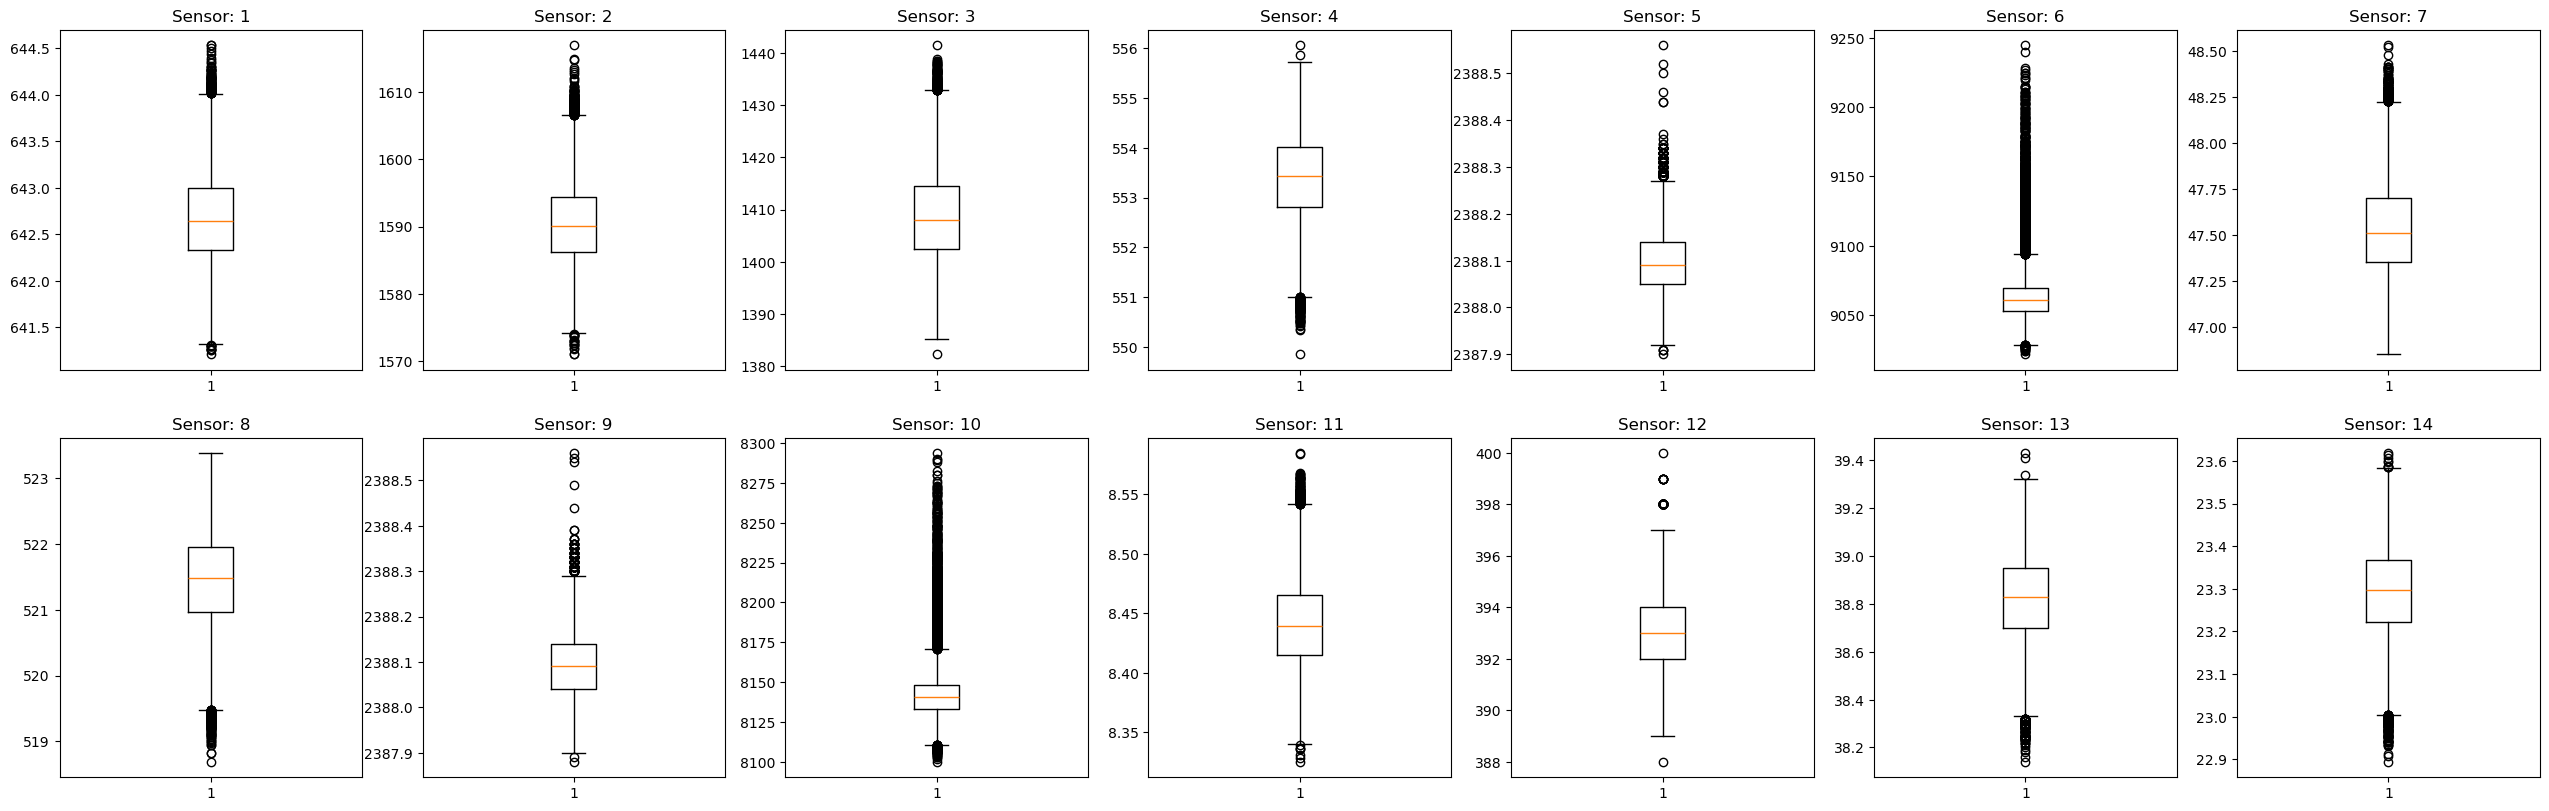

In [19]:
plt.figure(figsize = (32,15))
for i in np.arange(5, 19):        
    temp = train.iloc[:, i]
    plt.subplot(3,7,i-4)
    plt.boxplot(temp)
    plt.title("Sensor: "+ str(i-4))
plt.show()

[6, 7, 8, 11, 12, 13, 15, 16, 17, 18, 19, 21, 24, 25]


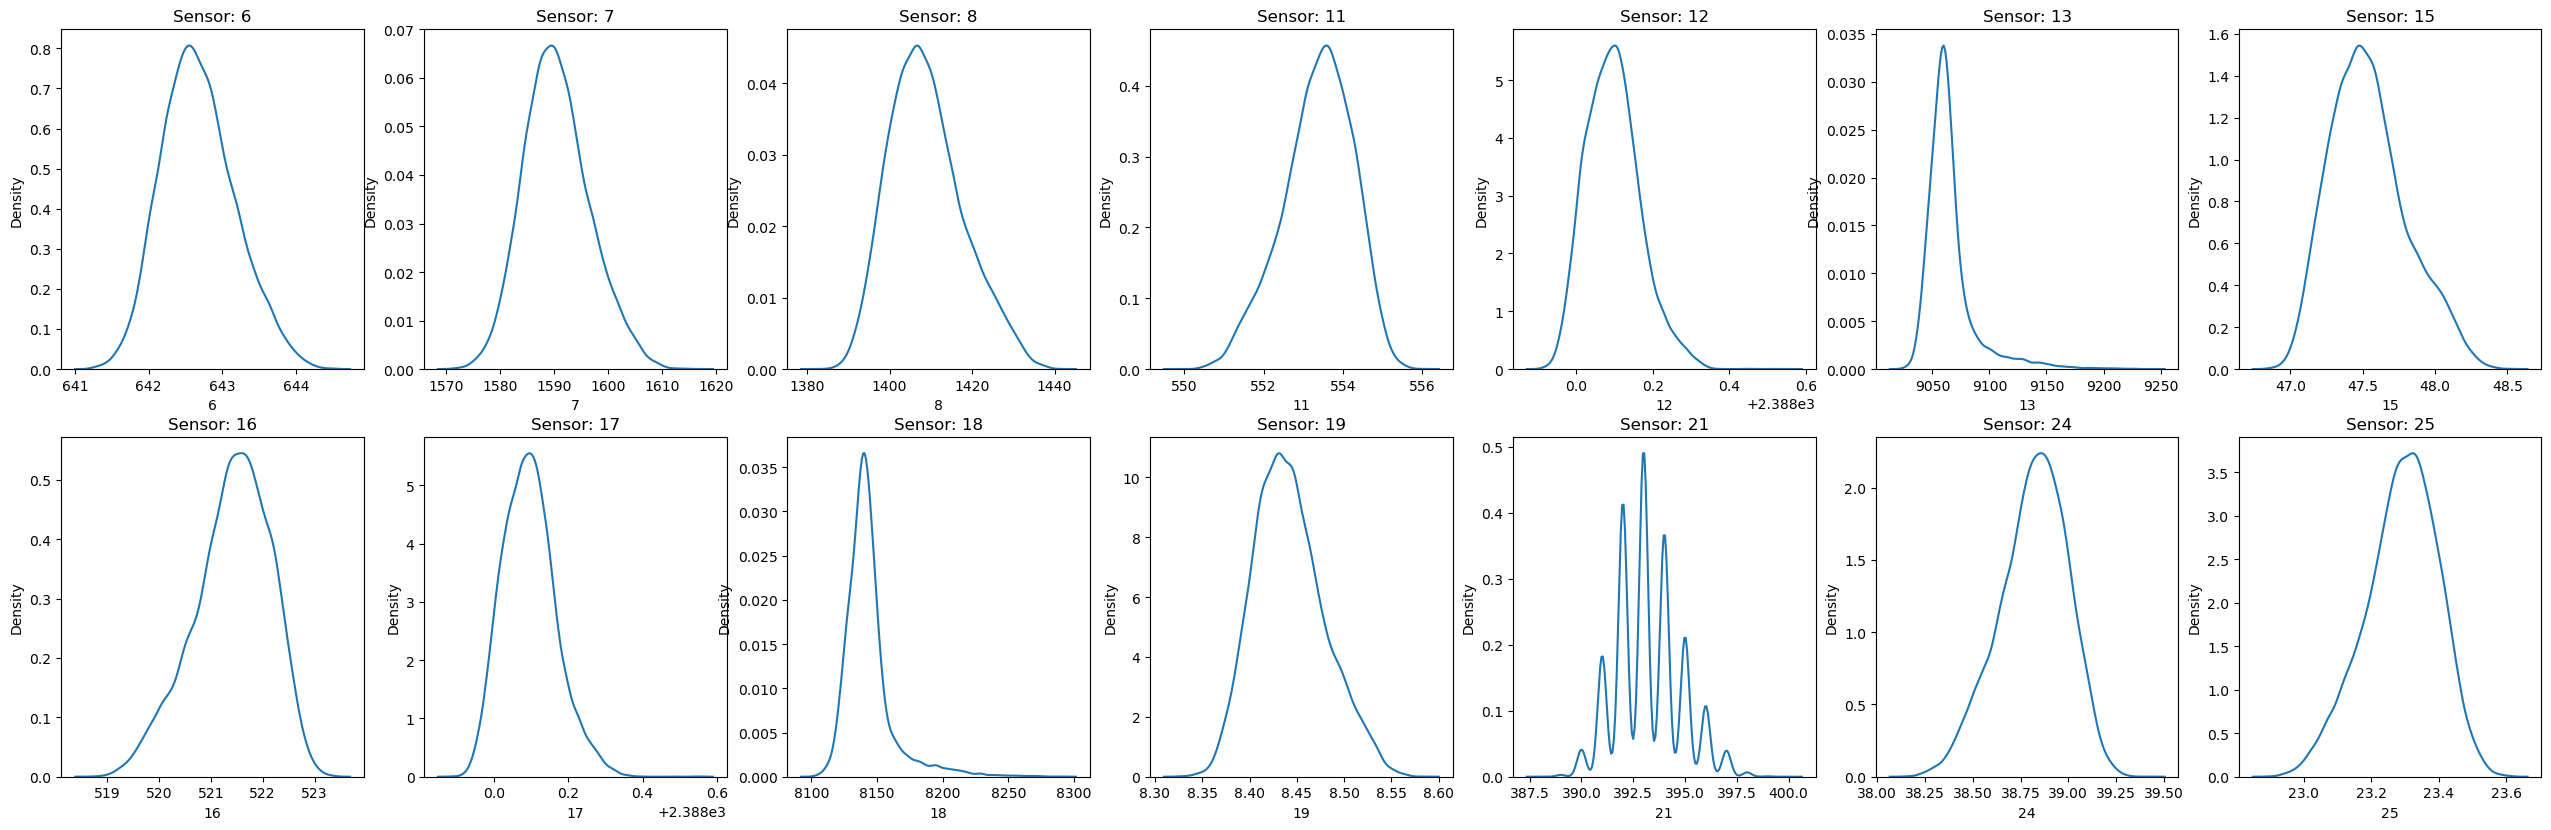

In [12]:
plt.figure(figsize = (32,15))
columns=[5,9,10,14,20,22,23]
all_col = [i for i in range(5,26)]
rem_col = [i for i in all_col if i not in columns]
print(rem_col)
for i,j in enumerate(rem_col):
    temp = df.iloc[:, j]
    plt.subplot(3,7, i+1)
    sns.kdeplot(temp, legend=False)
    plt.title("Sensor: "+ str(j))
plt.show()

In [13]:
df1 = pd.read_csv("test_FD001.txt", sep = "\s+", header = None)
df1.shape

(13096, 26)

In [14]:
test = df1.drop(axis=1, columns = columns)
print(train.shape)
print(test.shape)

(20631, 19)
(13096, 19)


[6, 7, 8, 11, 12, 13, 15, 16, 17, 18, 19, 21, 24, 25]


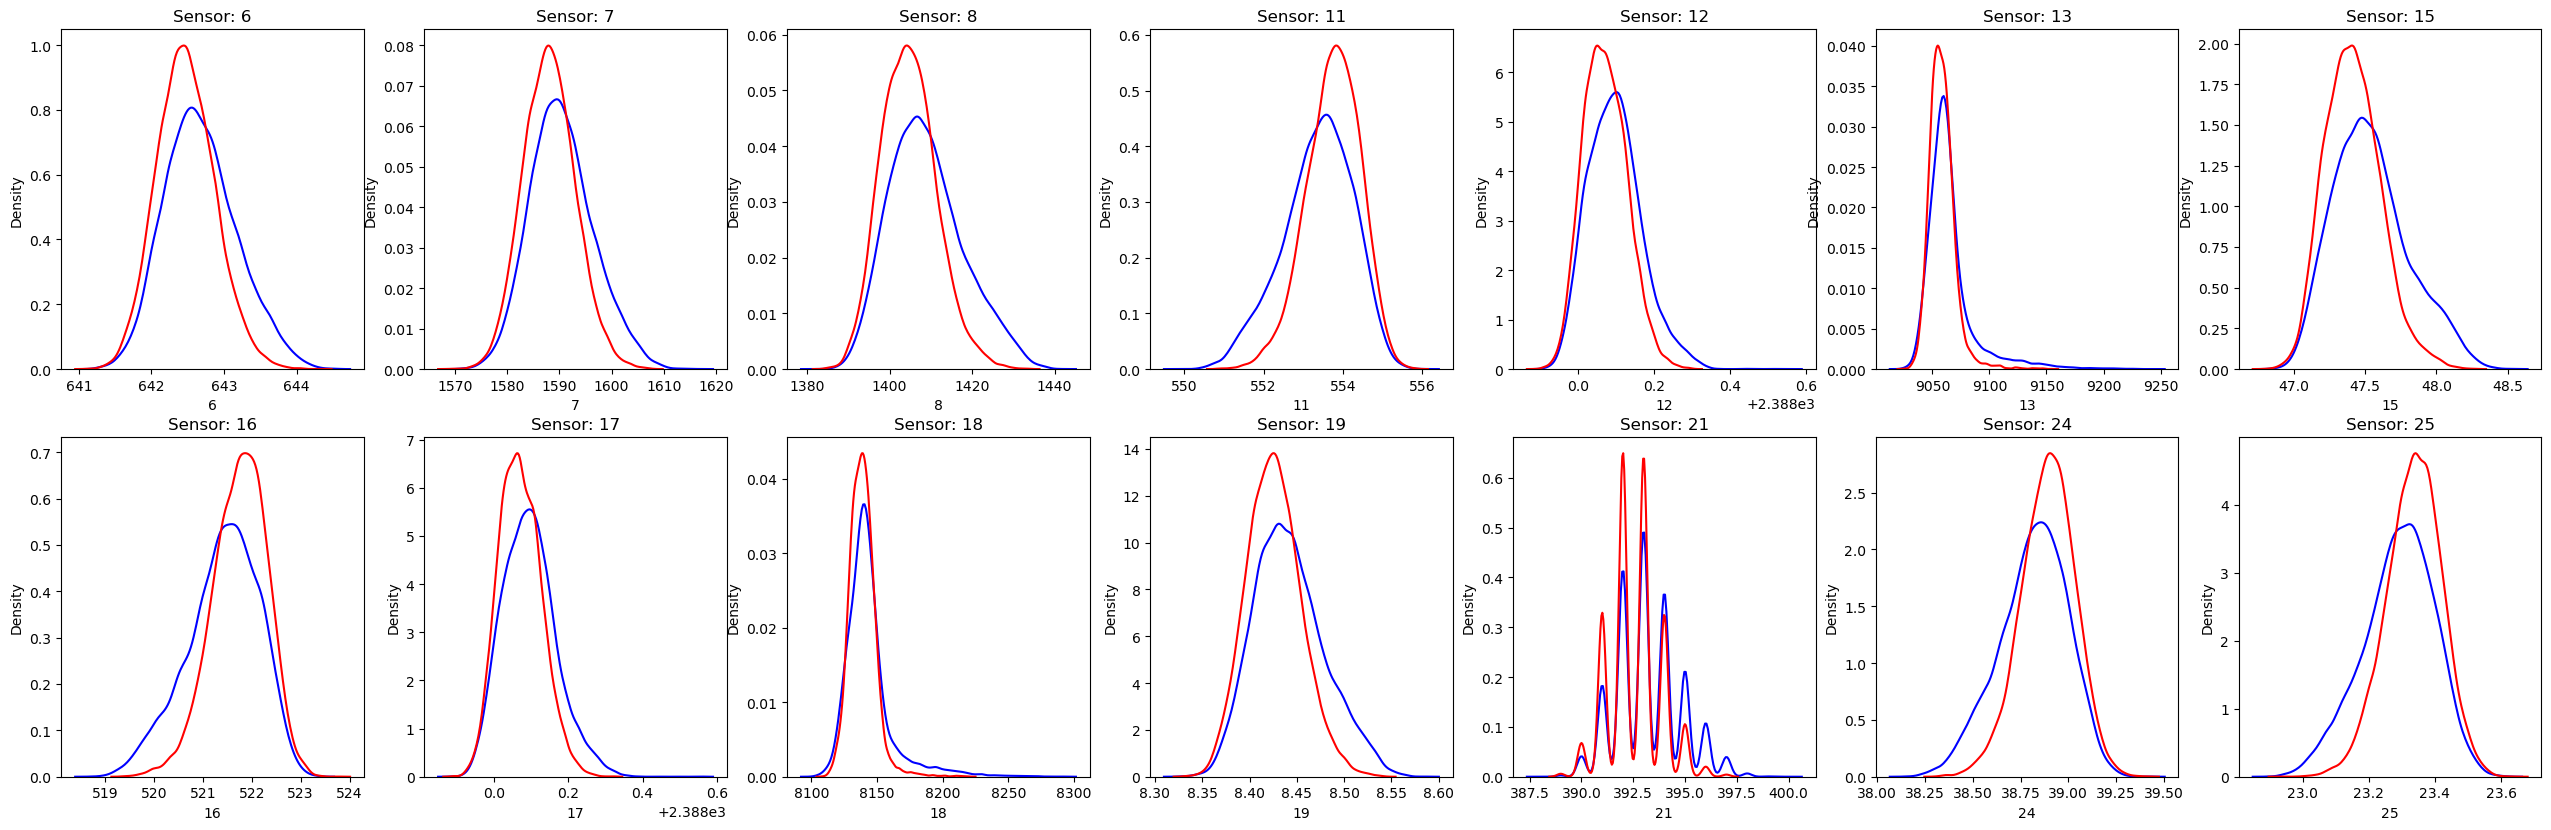

In [15]:
plt.figure(figsize = (32,15))
columns=[5,9,10,14,20,22,23]
all_col = [i for i in range(5,26)]
rem_col = [i for i in all_col if i not in columns]
print(rem_col)
for i,j in enumerate(rem_col):
    temp_train = df.iloc[:, j]
    temp_test = df1.iloc[:, j]
    plt.subplot(3,7, i+1)
    sns.kdeplot(temp_train, legend=False, color = "blue")
    sns.kdeplot(temp_test, legend=False, color = "red")
    plt.title("Sensor: "+ str(j))
plt.show()

In [16]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)
train_scaled = pd.DataFrame(train_scaled)
test_scaled = pd.DataFrame(test_scaled)



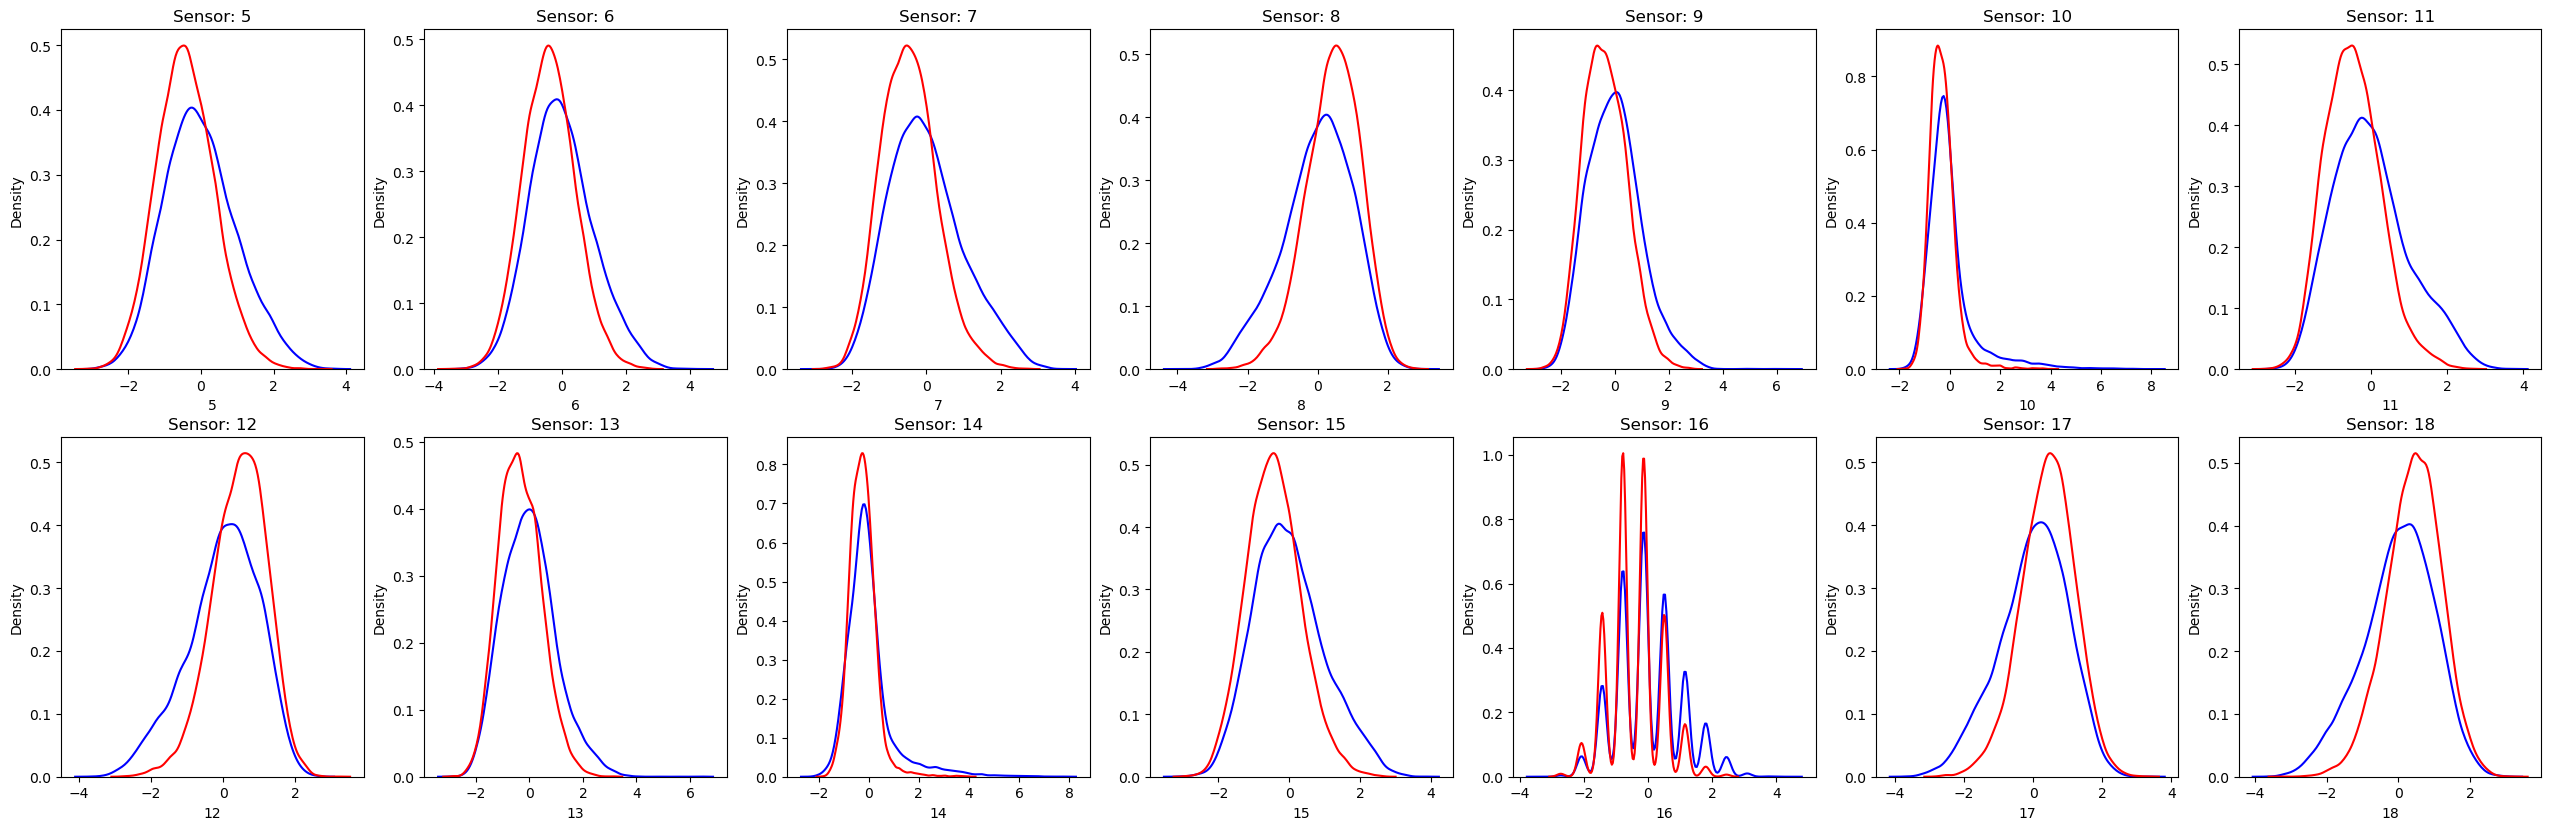

In [17]:
plt.figure(figsize = (32,15))
columns=[5,9,10,14,20,22,23]
all_col = [i for i in range(5,26)]
rem_col = [i for i in all_col if i not in columns]
for i,j in enumerate([i for i in range(5,19)]):
    temp_train = train_scaled.iloc[:, j]
    temp_test = test_scaled.iloc[:, j]
    plt.subplot(3,7, i+1)
    sns.kdeplot(temp_train, legend=False, color = "blue")
    sns.kdeplot(temp_test, legend=False, color = "red")
    plt.title("Sensor: "+ str(j))
plt.show()